In [1]:
import pandas as pd
import seaborn as sns

from itertools import combinations
from sklearn import linear_model

sns.set()
color_palette = sns.color_palette()

%matplotlib inline

In [2]:
df = pd.read_csv(
    "https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data",
    sep='\t', index_col=0,
)

In [3]:
df = df[df['train'] == 'T']
X = df.drop(columns=['lpsa', 'train']).astype(float)
y = df['lpsa'].astype(float)

In [4]:
rss = pd.DataFrame([[0, ((y - y.mean()) ** 2).sum()]], columns=['k', 'rss'])

for k in range(1, 1 + len(X.columns)):
    for subset in combinations(X.columns, k):
        X_subset = X[list(subset)]
        regr = linear_model.LinearRegression()
        regr.fit(X_subset, y)
        y_pred = regr.predict(X_subset)
        rss = rss.append(
            {'k': k, 'rss': ((y - y_pred) ** 2).sum()},
            ignore_index=True,
        )

/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


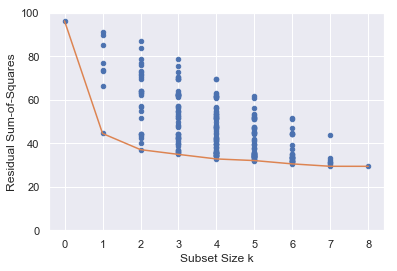

In [5]:
ax = rss.plot.scatter('k', 'rss', c=color_palette[0])
rss.groupby('k').min().plot(ax=ax, legend=False, c=color_palette[1])
ax.set_ylim(bottom=0, top=100)
ax.set_xlabel("Subset Size k")
ax.set_ylabel("Residual Sum-of-Squares");